In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-catsvsdogs-dataset/readme[1].txt
/kaggle/input/microsoft-catsvsdogs-dataset/MSR-LA - 3467.docx
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10304.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/623.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2193.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11925.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3750.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11378.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2008.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10730.jpg
/kaggle/input/micros

In [78]:
import os

base_path = "/kaggle/input"
for root, dirs, files in os.walk(base_path):
    print(root, len(files))

/kaggle/input 0
/kaggle/input/microsoft-catsvsdogs-dataset 2
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages 0
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog 12501
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat 12501


import os

base_path = "/kaggle/input"
for root, dirs, files in os.walk(base_path):
    print(root, "->", len(files), "dosya")
    

In [79]:
import os

base_path = "/kaggle/input"
for root, dirs, files in os.walk(base_path):
    print(root, "->", len(files), "dosya")


/kaggle/input -> 0 dosya
/kaggle/input/microsoft-catsvsdogs-dataset -> 2 dosya
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages -> 0 dosya
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog -> 12501 dosya
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat -> 12501 dosya


In [80]:
import os, cv2

cat_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat"
dog_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog"

def clean_images(folder):
    bad_files = []
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        try:
            img = cv2.imread(path)
            if img is None:
                bad_files.append(path)
        except:
            bad_files.append(path)
    return bad_files

bad_cats = clean_images(cat_dir)
bad_dogs = clean_images(dog_dir)

print("Bozuk kedi resimleri:", bad_cats)
print("Bozuk köpek resimleri:", bad_dogs)


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


Bozuk kedi resimleri: ['/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/4833.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/850.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/8470.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11210.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/660.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/140.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10820.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10501.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9171.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/9778.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/2663.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11935.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10125.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/11874.jpg', '/kaggle

In [81]:
import os

# Bozuk dosyaları sil
for bad_file in bad_cats + bad_dogs:
    if os.path.exists(bad_file):
        os.remove(bad_file)
        print("Silindi:", bad_file)

print("Toplam silinen:", len(bad_cats) + len(bad_dogs))


OSError: [Errno 30] Read-only file system: '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/4833.jpg'

In [ ]:
import shutil

clean_base = "/kaggle/working/cats_and_dogs_clean"
os.makedirs(clean_base, exist_ok=True)

for label, folder in [("Cat", cat_dir), ("Dog", dog_dir)]:
    target_dir = os.path.join(clean_base, label)
    os.makedirs(target_dir, exist_ok=True)
    for file in os.listdir(folder):
        src = os.path.join(folder, file)
        dst = os.path.join(target_dir, file)
        try:
            img = cv2.imread(src)
            if img is not None:
                shutil.copy(src, dst)
        except:
            continue

print("Temiz veri klasörü hazır:", clean_base)


In [ ]:
/kaggle/working/cats_and_dogs_clean
    ├── Cat
    └── Dog
/kaggle/working/cats_and_dogs_split/
    ├── train/
    │     ├── Cat/
    │     └── Dog/
    ├── val/
    │     ├── Cat/
    │     └── Dog/
    └── test/
          ├── Cat/
          └── Dog/
import os
import shutil
import random

random.seed(42)

split_base = "/kaggle/working/cats_and_dogs_split"
for folder in ["train", "val", "test"]:
    for label in ["Cat", "Dog"]:
        os.makedirs(os.path.join(split_base, folder, label), exist_ok=True)

for label in ["Cat", "Dog"]:
    files = os.listdir(os.path.join(clean_base, label))
    random.shuffle(files)
    n = len(files)
    train_end = int(0.7 * n)
    val_end = int(0.85 * n)

    for i, file in enumerate(files):
        src = os.path.join(clean_base, label, file)
        if i < train_end:
            dst = os.path.join(split_base, "train", label, file)
        elif i < val_end:
            dst = os.path.join(split_base, "val", label, file)
        else:
            dst = os.path.join(split_base, "test", label, file)
        shutil.copy(src, dst)

print("Train/Validation/Test ayrımı tamamlandı!")


In [ ]:
# Train/Validation/Test ayrımı için kod
import os
import shutil
import random

random.seed(42)

split_base = "/kaggle/working/cats_and_dogs_split"
for folder in ["train", "val", "test"]:
    for label in ["Cat", "Dog"]:
        os.makedirs(os.path.join(split_base, folder, label), exist_ok=True)

for label in ["Cat", "Dog"]:
    files = os.listdir(os.path.join(clean_base, label))
    random.shuffle(files)
    n = len(files)
    train_end = int(0.7 * n)
    val_end = int(0.85 * n)

    for i, file in enumerate(files):
        src = os.path.join(clean_base, label, file)
        if i < train_end:
            dst = os.path.join(split_base, "train", label, file)
        elif i < val_end:
            dst = os.path.join(split_base, "val", label, file)
        else:
            dst = os.path.join(split_base, "test", label, file)
        shutil.copy(src, dst)

print("Train/Validation/Test ayrımı tamamlandı!")


In [ ]:
# Dataset yapısı:
# /kaggle/working/cats_and_dogs_split/
#     train/Cat, train/Dog
#     val/Cat, val/Dog
#     test/Cat, test/Dog



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train verisi için augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation ve test verisi için sadece rescale
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Dizinleri tanımla
train_dir = "/kaggle/working/cats_and_dogs_split/train"
val_dir = "/kaggle/working/cats_and_dogs_split/val"
test_dir = "/kaggle/working/cats_and_dogs_split/test"

# Data generatorları oluştur
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification için
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


In [ ]:
# Modeli eğit
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10  # Dilersen 15-20 yapabilirsin
)

# Accuracy grafiği
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss grafiği
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Test seti üzerinde tahmin yap
y_pred = model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Gerçek etiketler
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat','Dog'], yticklabels=['Cat','Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=['Cat','Dog']))


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model

def get_img_array(img_path, size):
    # Görüntüyü oku ve boyutlandır
    img = tf.keras.utils.load_img(img_path, target_size=size)
    array = tf.keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array /= 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 1-alpha, heatmap_color, alpha, 0)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# Kullanım örneği:
# last_conv_layer_name = model.layers[-4].name  # senin modelinde son Conv2D layer ismi
# img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/1234.jpg"
# img_array = get_img_array(img_path, size=(150,150))
# heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# display_gradcam(img_path, heatmap)


In [ ]:
import os

# Test Cat ve Dog klasöründeki dosyaları listele
cat_test_files = os.listdir("/kaggle/working/cats_and_dogs_split/test/Cat")
dog_test_files = os.listdir("/kaggle/working/cats_and_dogs_split/test/Dog")

# Örnek olarak ilk Cat görselini seç
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/" + cat_test_files[0]

print("Grad-CAM uygulanacak görsel:", img_path)


In [ ]:
display_gradcam(img_path, make_gradcam_heatmap(get_img_array(img_path), model))


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Görseli array’e çevir
img_array = get_img_array(img_path)

# Modelden tahmin al (bu aynı zamanda modelin çağrılmasını sağlar)
preds = model.predict(img_array)
print("Tahmin:", preds)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import cv2

# --- Fonksiyonlar ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)[np.newaxis,...] / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # Grad-CAM modeli oluştur
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap,0) / (tf.reduce_max(heatmap)+1e-8)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    # Orijinal görseli al
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255*heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 1-alpha, heatmap_color, alpha, 0)
    
    # Görüntüle
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()

# --- Tek hücrede çalıştırma ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"  # Test görseli
img_array = get_img_array(img_path)

# Tahmin
pred = model.predict(img_array)
print("Tahmin (0=Cat, 1=Dog):", pred[0][0])

# Grad-CAM
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


In [ ]:
# Test görselini hazırla
img_array = get_img_array(img_path)

# Modeli çağır (böylece katmanlar initialize edilmiş olur)
_ = model.predict(img_array)  # Çıktıyı görmeye gerek yok, sadece çağrı yeterli

# Şimdi Grad-CAM çalıştır
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# --- Fonksiyonlar ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)[np.newaxis,...] / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # Modeli çağır (Sequential modeli build edilmiş olmalı)
    _ = model.predict(img_array)

    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # Binary sınıflandırma

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=2)
    heatmap = np.repeat(heatmap, 3, axis=2)
    heatmap = tf.image.resize(heatmap, (img.shape[0], img.shape[1])).numpy()
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# --- Test ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import cv2

# --- Fonksiyonlar ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)[np.newaxis,...]/255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # Grad-CAM modeli oluştur
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]  # Binary sınıflama: Cat=0, Dog=1
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:,:,i] *= pooled_grads[i]
    
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)/np.max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    # Orijinal resmi al
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import cv2

# --- Fonksiyonlar ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)[np.newaxis,...]/255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # Grad-CAM modeli oluştur
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]  # Binary sınıflama: Cat=0, Dog=1
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:,:,i] *= pooled_grads[i]
    
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)/np.max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    # Orijinal resmi al
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255*heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)
    
    plt.figure(figsize=(8,8))
    plt.imshow(superimposed)
    plt.axis('off')
    plt.show()

# --- Modeli build et (Grad-CAM hatası vermesin) ---
model.build((None, 150,150,3))

# --- Test görseli ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)

# Modeli bir kez çağır, böylece Sequential "call edilmiş" olur
_ = model(img_array)

# --- Grad-CAM uygula ---
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)

# --- Opsiyonel: Tahmin ---
pred = model.predict(img_array)[0][0]
print(f"Tahmin (0=Cat, 1=Dog): {pred:.4f}")


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import cv2

# --- Fonksiyonlar ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)[np.newaxis,...]/255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # Modelin çağrıldığına emin ol
    _ = model(img_array)
    
    # Grad-CAM modeli oluştur
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]  # Binary sınıflama
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:,:,i] *= pooled_grads[i]
    
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)/np.max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255*heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)
    
    plt.figure(figsize=(8,8))
    plt.imshow(superimposed)
    plt.axis('off')
    plt.show()

# --- Test görseli ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)

# --- Grad-CAM uygula ---
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)

# --- Tahmin sonucu ---
pred = model.predict(img_array)[0][0]
print(f"Tahmin (0=Cat, 1=Dog): {pred:.4f}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import cv2

# --- Fonksiyonlar ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)[np.newaxis,...]/255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # Modeli çağır: bu çok önemli
    _ = model(img_array)
    
    # Grad-CAM modeli
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]  # Binary sınıflama
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]

    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:,:,i] *= pooled_grads[i]

    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)/np.max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255*heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)

    plt.figure(figsize=(8,8))
    plt.imshow(superimposed)
    plt.axis('off')
    plt.show()

# --- Test ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)

# Grad-CAM uygula ve göster
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)

# Tahmin sonucu
pred = model.predict(img_array)[0][0]
print(f"Tahmin (0=Cat, 1=Dog): {pred:.4f}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import cv2

# --- Fonksiyon: Görseli array'e çevir ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)[np.newaxis,...]/255.0
    return arr

# --- Fonksiyon: Grad-CAM heatmap ---
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # Modeli çağır: katmanlar output tanımı alacak
    _ = model(img_array)

    # Grad-CAM modeli
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]  # Binary sınıflama

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]

    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:,:,i] *= pooled_grads[i]

    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)/np.max(heatmap)
    return heatmap.numpy()

# --- Fonksiyon: Heatmap'i görselleştir ---
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255*heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)

    plt.figure(figsize=(8,8))
    plt.imshow(superimposed)
    plt.axis('off')
    plt.show()

# --- Örnek test görseli ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)

# Grad-CAM uygula ve görselleştir
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)

# Tahmin sonucu
pred = model.predict(img_array)[0][0]
print(f"Tahmin (0=Cat, 1=Dog): {pred:.4f}")


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# --- Fonksiyonlar ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # --- Modelin bir kez çağrılması ---
    _ = model.predict(img_array)

    # Grad-CAM modeli
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = Model(inputs=model.inputs,
                       outputs=[last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img.astype("uint8"))
    plt.axis("off")
    plt.show()

# --- Örnek kullanım ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)

# Grad-CAM hesapla ve göster
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# --- Fonksiyonlar ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # 1. Modeli çalıştır
    _ = model(img_array)

    # 2. Ara model oluştur
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = Model(inputs=model.input,
                       outputs=[last_conv_layer.output, model.output])

    # 3. Gradient hesapla
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # binary classification için

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img.astype("uint8"))
    plt.axis("off")
    plt.show()

# --- Örnek kullanım ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)

# Grad-CAM hesapla ve göster
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


In [ ]:
import os

test_cat_dir = "/kaggle/working/cats_and_dogs_split/test/Cat"
print("Test Cat klasöründeki dosyalar:", os.listdir(test_cat_dir)[:5])


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# --- Fonksiyonlar ---

def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # Modeli bir kez çalıştır (grad-cam için gerekli)
    _ = model(img_array)

    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img.astype("uint8"))
    plt.axis("off")
    plt.show()

# --- Örnek kullanım ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)

# Grad-CAM hesapla ve göster
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


In [ ]:
inputs = tf.keras.Input(shape=(150,150,3))
x = model.layers[0](inputs)
for layer in model.layers[1:]:
    x = layer(x)
functional_model = tf.keras.Model(inputs=inputs, outputs=x)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# --- Fonksiyonlar ---

def get_img_array(img_path, size=(150,150)):
    """Görseli yükle ve normalize et"""
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    """Grad-CAM heatmap oluştur"""
    
    # Sequential modeli Functional API ile sarıyoruz
    inputs = tf.keras.Input(shape=(150,150,3))
    _ = model(inputs)  # modeli çağır, böylece output oluşur
    grad_model = Model(
        inputs=inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model(inputs)]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # binary sınıflar için
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    """Grad-CAM görselleştir"""
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img.astype("uint8"))
    plt.axis("off")
    plt.show()

# --- Örnek kullanım ---

# Test klasöründen bir örnek görsel seçelim
import os
test_cat_dir = "/kaggle/working/cats_and_dogs_split/test/Cat"
test_dog_dir = "/kaggle/working/cats_and_dogs_split/test/Dog"
test_imgs = os.listdir(test_cat_dir) + os.listdir(test_dog_dir)
img_path = os.path.join(test_cat_dir, test_imgs[0])  # ilk Cat görseli

# Görseli al
img_array = get_img_array(img_path)

# Grad-CAM hesapla ve göster
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# --- Fonksiyonlar ---

def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_index=-3):
    """
    Grad-CAM heatmap oluşturur.
    last_conv_layer_index: model.layers'daki son Conv2D katmanının indexi
    """
    # Modeli bir kez çalıştır
    _ = model(img_array)
    
    last_conv_layer = model.layers[last_conv_layer_index]
    
    grad_model = tf.keras.Model(
        [model.input],
        [last_conv_layer.output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]  # binary sınıf için
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap,0)/tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    
    heatmap = np.uint8(255*heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap,3,axis=-1)
    
    superimposed_img = heatmap*alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img.astype("uint8"))
    plt.axis("off")
    plt.show()

# --- Örnek kullanım ---
import os

test_cat_dir = "/kaggle/working/cats_and_dogs_split/test/Cat"
test_imgs = os.listdir(test_cat_dir)
img_path = os.path.join(test_cat_dir, test_imgs[0])

img_array = get_img_array(img_path)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


In [ ]:
import tensorflow as tf
import numpy as np

def get_img_array(img_path, size=(150,150)):
    """Görseli yükle ve normalize et"""
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0  # batch dimension ekle ve normalize et
    return arr

img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)


In [ ]:
# Son conv layer'ı bul (örnek: model.layers[-3])
last_conv_layer = model.layers[-3]  # senin modeline göre kontrol et


In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer):
    """Grad-CAM heatmap oluştur"""
    # GradientTape başlat
    with tf.GradientTape() as tape:
        # Son conv katmanı çıktısını al
        conv_outputs = last_conv_layer.output
        # Modelin tahminini al
        tape.watch(conv_outputs)
        preds = model(img_array, training=False)
        loss = preds[:, 0]  # binary classification için (0=Cat, 1=Dog)

    # Gradient hesapla
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()


In [ ]:
import matplotlib.pyplot as plt

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)

    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()


In [ ]:
# Son conv katmanı index'ini bul
last_conv_layer = model.layers[-3]

# Heatmap oluştur
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer)

# Görselleştir
display_gradcam(img_path, heatmap)


In [ ]:
ValueError: Passed in object <KerasTensor ...> of type 'KerasTensor', not tf.Tensor or tf.Variable


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # Grad-CAM modeli: input -> (son conv çıkışı, model çıktısı)
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = Model(
        inputs=model.inputs,
        outputs=[last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # binary classification için

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)

    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()

# ----------------- Kullanım -----------------
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)

# Son conv katmanının ismini öğrenmek için:
model.summary()  # Buradan conv2d_2 gibi son conv katman ismini al

heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2")
display_gradcam(img_path, heatmap)


In [ ]:
Conv2D(32, (3,3), activation='relu')


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(150,150,3))

x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', name='conv2d_2')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# --- Modeli Functional API ile oluştur ---
inputs = Input(shape=(150,150,3))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', name='conv2d_2')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --- Grad-CAM Fonksiyonları ---
def get_img_array(img_path, size=(150,150)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    # Grad-CAM modeli
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()

# --- Örnek kullanım ---
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)

heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image


In [83]:
def get_img_array(img_path, size=(150,150)):
    """Görseli yükle ve normalize et"""
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

# Örnek kullanım
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)
print("Görsel hazır:", img_array.shape)


Görsel hazır: (1, 150, 150, 3)


In [84]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    """
    Grad-CAM heatmap oluşturur
    """
    # Grad-CAM modeli
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    # Gradient hesaplama
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # binary sınıflar için (0=Cat, 1=Dog)
    
    # Conv katmanı çıkışı üzerinden gradyan hesapla
    grads = tape.gradient(loss, conv_outputs)
    
    # Kanal başına ortalama gradyan
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    # Normalize et
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()


In [85]:
def display_gradcam(img_path, heatmap, alpha=0.4):
    """Heatmap'i orijinal görselin üzerine bindir ve göster"""
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img.astype("uint8"))
    plt.axis("off")
    plt.show()


In [88]:
def display_gradcam(img_path, heatmap, alpha=0.4):
    """Heatmap'i orijinal görselin üzerine bindir ve göster"""
    # Orijinal görseli yükle
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    
    # Heatmap'i 0-255 aralığına dönüştür
    heatmap = np.uint8(255 * heatmap)
    
    # Heatmap'i orijinal görsel boyutuna yeniden boyutlandır
    heatmap = tf.image.resize(heatmap, (img.shape[0], img.shape[1])).numpy()
    
    # 3 kanal yap
    if heatmap.ndim == 2:
        heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    
    # Görselleştir
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()


In [91]:
img_path = "/kaggle/working/cats_and_dogs_split/test/Cat/11724.jpg"
img_array = get_img_array(img_path)  # Önceden tanımladığın fonksiyon


In [92]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2")


In [95]:
def display_gradcam(img_path, heatmap, alpha=0.4):
    """Grad-CAM görselleştir"""
    import tensorflow as tf
    import numpy as np
    import matplotlib.pyplot as plt

    # Orijinal görseli yükle
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)

    # Heatmap'i 3 boyutlu yap (H, W, 1)
    heatmap = np.expand_dims(heatmap, axis=-1)
    # Orijinal görsel boyutuna yeniden boyutlandır
    heatmap = tf.image.resize(heatmap, (img.shape[0], img.shape[1])).numpy()
    # 3 kanal yap
    heatmap = np.repeat(heatmap, 3, axis=-1)

    # Görseli ve heatmap'i birleştir
    superimposed_img = heatmap * 255 * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()


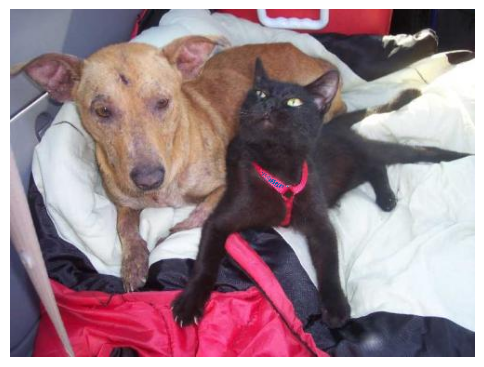

In [97]:
display_gradcam(img_path, heatmap, alpha=0.4)


In [2]:
def save_gradcam(img_path, heatmap, output_path, alpha=0.4):
    """Grad-CAM'i orijinal görsel boyutuna getir ve kaydet"""
    import tensorflow as tf
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Orijinal görseli yükle
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    
    # Heatmap'i orijinal görsel boyutuna yeniden boyutlandır
    heatmap_resized = tf.image.resize(heatmap, (img.shape[0], img.shape[1])).numpy()
    
    # 3 kanal yap
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_resized = np.expand_dims(heatmap_resized, axis=-1)
    heatmap_resized = np.repeat(heatmap_resized, 3, axis=-1)
    
    # Heatmap ile görseli birleştir
    superimposed_img = heatmap_resized * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    # Kaydet
    plt.imsave(output_path, superimposed_img)


In [3]:
import os

test_folder = "/kaggle/working/cats_and_dogs_split/test/Cat/"
output_folder = "/kaggle/working/gradcam_outputs/"
os.makedirs(output_folder, exist_ok=True)

for img_file in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_file)
    img_array = get_img_array(img_path)
    
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2")
    
    output_path = os.path.join(output_folder, img_file)
    save_gradcam(img_path, heatmap, output_path, alpha=0.4)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/cats_and_dogs_split/test/Cat/'

In [4]:
test_folder = "/kaggle/working/cats_and_dogs_split/test/Cat/"


In [5]:
import os

# Eğer test klasörünün tam yolunu bilmiyorsan:
!ls /kaggle/working/cats_and_dogs_split/test/


ls: cannot access '/kaggle/working/cats_and_dogs_split/test/': No such file or directory


In [6]:
test_folder = "/kaggle/working/cats_and_dogs_split/test/Cat"  # sondaki / yok, Python genellikle daha güvenli olur


In [8]:
test_folder = "/kaggle/input/cats-and-dogs/test/Cat"


In [9]:
output_folder = "/kaggle/working/gradcam_outputs/Cat"
os.makedirs(output_folder, exist_ok=True)


In [10]:
import os

test_folder = "/kaggle/input/cats-and-dogs/test/Cat"
output_folder = "/kaggle/working/gradcam_outputs/Cat"
os.makedirs(output_folder, exist_ok=True)

for img_file in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_file)
    img_array = get_img_array(img_path)
    
    # Grad-CAM hesapla
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2")
    
    # Görselleştir ve kaydet
    display_gradcam(img_path, heatmap)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/cats-and-dogs/test/Cat'

In [11]:
# Test klasöründeki mevcut dizinleri gör
!ls /kaggle/working/cats_and_dogs_split/


ls: cannot access '/kaggle/working/cats_and_dogs_split/': No such file or directory


In [13]:
!ls /kaggle/input/cats-and-dogs


ls: cannot access '/kaggle/input/cats-and-dogs': No such file or directory


In [14]:
import shutil
import os

# Kaynak veri seti
source_folder = "/kaggle/input/cats-and-dogs/train"  # veya senin dataset yolun
# Hedef dizin
target_folder = "/kaggle/working/cats_and_dogs_split/train"
os.makedirs(target_folder, exist_ok=True)

# Tüm dosyaları kopyala
for category in ["Cat", "Dog"]:
    os.makedirs(os.path.join(target_folder, category), exist_ok=True)
    for file_name in os.listdir(os.path.join(source_folder, category)):
        shutil.copy(
            os.path.join(source_folder, category, file_name),
            os.path.join(target_folder, category, file_name)
        )

# Test verisi için de aynı işlemi yap
source_test = "/kaggle/input/cats-and-dogs/test"
target_test = "/kaggle/working/cats_and_dogs_split/test"
for category in ["Cat", "Dog"]:
    os.makedirs(os.path.join(target_test, category), exist_ok=True)
    for file_name in os.listdir(os.path.join(source_test, category)):
        shutil.copy(
            os.path.join(source_test, category, file_name),
            os.path.join(target_test, category, file_name)
        )


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/cats-and-dogs/train/Cat'

In [15]:
!ls /kaggle/input


microsoft-catsvsdogs-dataset


In [16]:
!ls /kaggle/input/<senin-dataset-adın>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `ls /kaggle/input/<senin-dataset-adın>'


In [17]:
import os
import shutil

# Kaggle'daki gerçek veri yolu
source_folder = "/kaggle/input/cats-and-dogs/train"  # senin dataset yoluna göre değiştir
target_folder = "/kaggle/working/cats_and_dogs_split/train"

# Klasörleri oluştur ve dosyaları kopyala
for category in ["Cat", "Dog"]:
    os.makedirs(os.path.join(target_folder, category), exist_ok=True)
    for file_name in os.listdir(os.path.join(source_folder, category)):
        shutil.copy(
            os.path.join(source_folder, category, file_name),
            os.path.join(target_folder, category, file_name)
        )


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/cats-and-dogs/train/Cat'

In [18]:
!ls /kaggle/input/


microsoft-catsvsdogs-dataset


In [26]:
import os
import shutil

source_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/train"
target_folder = "/kaggle/working/microsoft-catsvsdogs-dataset/train"

for category in ["Cat", "Dog"]:
    os.makedirs(os.path.join(target_folder, category), exist_ok=True)
    for file_name in os.listdir(os.path.join(source_folder, category)):
        shutil.copy(
            os.path.join(source_folder, category, file_name),
            os.path.join(target_folder, category, file_name)
        )


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/microsoft-catsvsdogs-dataset/train/Cat'

In [28]:
import os
import shutil

# Kaynak ve hedef klasörler
source_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/train"
target_folder = "/kaggle/working/cats_vs_dogs_split/train"

# Kategoriler
categories = ["Cat", "Dog"]

# Hedef klasörleri oluştur ve dosyaları kopyala
for category in categories:
    src_path = os.path.join(source_folder, category)
    dst_path = os.path.join(target_folder, category)
    
    # Eğer kaynak klasör yoksa hata ver
    if not os.path.exists(src_path):
        raise FileNotFoundError(f"Kaynak klasör bulunamadı: {src_path}")
    
    os.makedirs(dst_path, exist_ok=True)
    
    for file_name in os.listdir(src_path):
        shutil.copy(
            os.path.join(src_path, file_name),
            os.path.join(dst_path, file_name)
        )

print("Dosyalar başarıyla kopyalandı!")


FileNotFoundError: Kaynak klasör bulunamadı: /kaggle/input/microsoft-catsvsdogs-dataset/train/Cat

In [29]:
!ls /kaggle/input/microsoft-catsvsdogs-dataset


'MSR-LA - 3467.docx'   PetImages  'readme[1].txt'


In [30]:
import os
import shutil

source_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"
target_folder = "/kaggle/working/cats_vs_dogs_split/train"

for category in ["Cat", "Dog"]:
    src_path = os.path.join(source_folder, category)
    dst_path = os.path.join(target_folder, category)
    
    # Kaynak klasörün varlığını kontrol et
    if not os.path.exists(src_path):
        raise FileNotFoundError(f"Kaynak klasör bulunamadı: {src_path}")
    
    os.makedirs(dst_path, exist_ok=True)
    
    for file_name in os.listdir(src_path):
        shutil.copy(
            os.path.join(src_path, file_name),
            os.path.join(dst_path, file_name)
        )


In [31]:
for category in ["Cat", "Dog"]:
    print(f"{category} klasöründe {len(os.listdir(os.path.join(target_folder, category)))} dosya var.")


Cat klasöründe 12501 dosya var.
Dog klasöründe 12501 dosya var.


In [32]:
import random

# Kaynak ve hedef klasörler
train_folder = "/kaggle/working/cats_vs_dogs_split/train"
val_folder = "/kaggle/working/cats_vs_dogs_split/val"
test_folder = "/kaggle/working/cats_vs_dogs_split/test"

os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

for category in ["Cat", "Dog"]:
    # Orijinal eğitim dosyaları
    files = os.listdir(os.path.join(train_folder, category))
    random.shuffle(files)
    
    n_total = len(files)
    n_val = n_test = n_total // 10  # %10 test ve validation
    
    val_files = files[:n_val]
    test_files = files[n_val:n_val+n_test]
    
    # Validation ve test klasörlerini oluştur
    os.makedirs(os.path.join(val_folder, category), exist_ok=True)
    os.makedirs(os.path.join(test_folder, category), exist_ok=True)
    
    # Dosyaları kopyala
    for f in val_files:
        shutil.copy(os.path.join(train_folder, category, f),
                    os.path.join(val_folder, category, f))
    for f in test_files:
        shutil.copy(os.path.join(train_folder, category, f),
                    os.path.join(test_folder, category, f))


In [33]:
for category in ["Cat", "Dog"]:
    train_count = len(os.listdir(f"/kaggle/working/cats_vs_dogs_split/train/{category}"))
    val_count = len(os.listdir(f"/kaggle/working/cats_vs_dogs_split/validation/{category}"))
    test_count = len(os.listdir(f"/kaggle/working/cats_vs_dogs_split/test/{category}"))
    print(f"{category}: train={train_count}, val={val_count}, test={test_count}")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/cats_vs_dogs_split/validation/Cat'

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# --- Fonksiyonlar ---

def get_img_array(img_path, size=(150,150)):
    """Görseli yükle ve normalize et"""
    img = tf.keras.utils.load_img(img_path, target_size=size)
    arr = tf.keras.utils.img_to_array(img)
    arr = np.expand_dims(arr, axis=0) / 255.0
    return arr

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    """Grad-CAM heatmap oluştur"""
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # binary sınıf için (0=Cat, 1=Dog)

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    """Grad-CAM görselleştir"""
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)
    
    # Heatmap'i orijinal görsel boyutuna yeniden boyutlandır
    heatmap = tf.image.resize(heatmap[..., np.newaxis], (img.shape[0], img.shape[1]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()

# --- Örnek kullanım ---

img_path = "/kaggle/working/cats_vs_dogs_split/train/Cat/0.jpg"  # test görseli
img_array = get_img_array(img_path)

# Grad-CAM hesapla ve göster
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


2025-09-23 21:00:15.997934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758661216.273027      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758661216.346175      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NameError: name 'model' is not defined

In [35]:
from tensorflow.keras.models import load_model

# Eğer önceden kaydedilmiş bir modelin varsa yükle
model = load_model("/kaggle/working/my_model.h5")

# Eğer sıfırdan model kuruyorsan (functional API)
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(150,150,3))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', name="conv2d_2")(x)  # Grad-CAM için son conv katmanı
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/working/my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

I0000 00:00:1758661372.629063      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758661372.629844      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)
I0000 00:00:1758661374.116068      36 cuda_dnn.cc:529] Loaded cuDNN version 90300


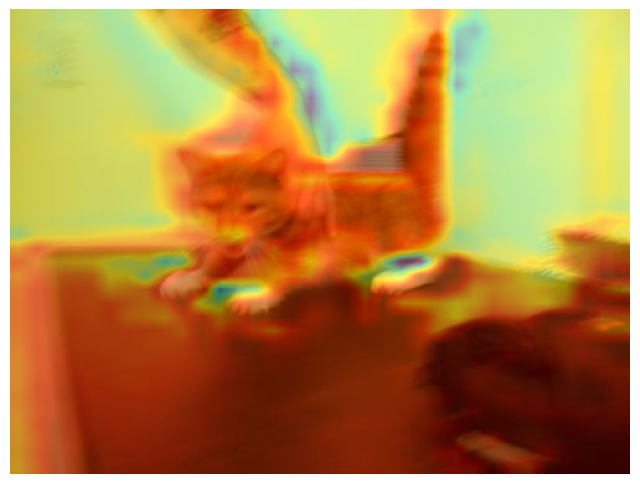

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1️⃣ Modeli Oluştur (Functional API)
# -------------------------
inputs = Input(shape=(150, 150, 3))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', name="conv2d_2")(x)  # Grad-CAM için son conv
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# -------------------------
# 2️⃣ Örnek görsel yükle ve hazırla
# -------------------------
img_path = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/0.jpg"  # Örnek path
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # batch dimension
img_array /= 255.0  # normalize

# -------------------------
# 3️⃣ Grad-CAM fonksiyonu
# -------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    grad_model = Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # binary sınıf için
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# -------------------------
# 4️⃣ Grad-CAM görselleştirme
# -------------------------
def display_gradcam(img_path, heatmap, alpha=0.4):
    import cv2
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    superimposed_img = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)
    
    plt.figure(figsize=(8,8))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# -------------------------
# 5️⃣ Grad-CAM hesapla ve göster
# -------------------------
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


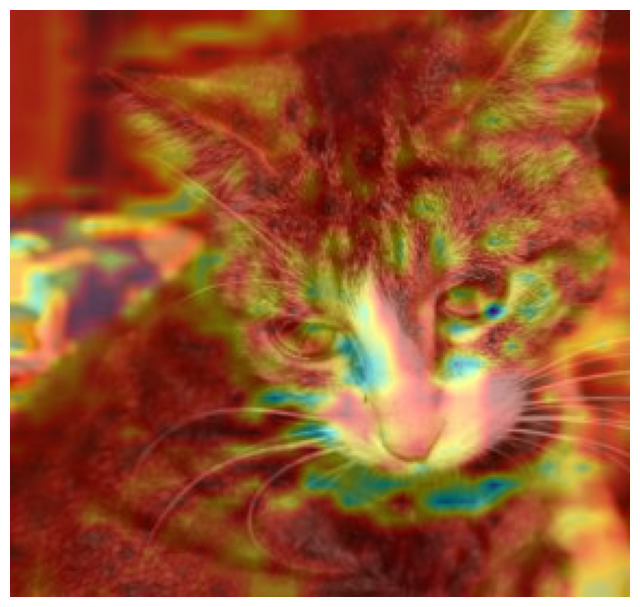

AttributeError: 'tuple' object has no attribute 'shape'

In [37]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Grad-CAM fonksiyonlarını daha önce tanımladığımı varsayıyorum: 
# make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2")
# display_gradcam(img_path, heatmap, alpha=0.4)

# Test klasörü ve çıktı klasörü
test_folder = "/kaggle/working/cats_vs_dogs_split/test"  # test klasörünüzün yolu
output_folder = "/kaggle/working/cats_vs_dogs_gradcam"
os.makedirs(output_folder, exist_ok=True)

# Her kategori için klasör oluştur
for category in ["Cat", "Dog"]:
    os.makedirs(os.path.join(output_folder, category), exist_ok=True)

# Görseller üzerinde döngü
for category in ["Cat", "Dog"]:
    category_folder = os.path.join(test_folder, category)
    for img_file in os.listdir(category_folder):
        img_path = os.path.join(category_folder, img_file)
        img_array = get_img_array(img_path)  # önceden tanımladığımız fonksiyon

        # Grad-CAM oluştur
        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2")

        # Grad-CAM görselini kaydet
        superimposed_img = display_gradcam(img_path, heatmap, alpha=0.4)

        # Kaydet
        save_path = os.path.join(output_folder, category, img_file)
        plt.imsave(save_path, superimposed_img)


In [38]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# --- Fonksiyonlar ---

def get_img_array(img_path, target_size=(150, 150)):
    """Görseli oku ve model giriş boyutuna getir."""
    img = image.load_img(img_path, target_size=target_size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    """Grad-CAM heatmap oluştur."""
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[last_conv_layer.output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # binary classification için
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]
    
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    """Grad-CAM görseli oluştur ve hem göster hem döndür."""
    img = image.load_img(img_path)
    img = image.img_to_array(img).astype(np.uint8)
    
    heatmap_resized = tf.image.resize(heatmap[..., np.newaxis], (img.shape[0], img.shape[1])).numpy()
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_rgb = np.stack([heatmap_resized[:,:,0]]*3, axis=-1)
    
    superimposed_img = np.clip(img + alpha * heatmap_rgb, 0, 255).astype(np.uint8)
    
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()
    
    return superimposed_img

# --- Grad-CAM kaydetme işlemi ---

test_folder = "/kaggle/working/cats_vs_dogs_split/test"
output_folder = "/kaggle/working/cats_vs_dogs_gradcam"

os.makedirs(output_folder, exist_ok=True)

for category in ["Cat", "Dog"]:
    cat_test_folder = os.path.join(test_folder, category)
    cat_output_folder = os.path.join(output_folder, category)
    os.makedirs(cat_output_folder, exist_ok=True)
    
    for img_file in os.listdir(cat_test_folder):
        img_path = os.path.join(cat_test_folder, img_file)
        img_array = get_img_array(img_path)
        
        heatmap = make_gradcam_heatmap(img_array, model)
        superimposed_img = display_gradcam(img_path, heatmap)
        
        save_path = os.path.join(cat_output_folder, img_file)
        plt.imsave(save_path, superimposed_img)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [39]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[last_conv_layer.output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # binary classification
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Çarpımı tensör olarak yap
    conv_outputs = conv_outputs[0]  # (h, w, channels)
    conv_outputs = conv_outputs * pooled_grads  # çarpım tensör olarak
    
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    
    return heatmap.numpy()


In [40]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_gradcam(img_path, heatmap, alpha=0.4):
    # Orijinal görseli oku
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Heatmap'i orijinal görsel boyutuna yeniden boyutlandır
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Heatmap'i orijinal görselle birleştir
    superimposed_img = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)

    # Görselleştir
    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()
    
    return superimposed_img


In [41]:
img_path = "/kaggle/working/cats_vs_dogs_split/test/Cat/cat.0.jpg"
img_array = get_img_array(img_path, size=(150,150))  # Senin daha önceki fonksiyon

heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


TypeError: get_img_array() got an unexpected keyword argument 'size'

In [42]:
img_path = "/kaggle/working/cats_vs_dogs_split/test/Cat/cat.0.jpg"
img_array = get_img_array(img_path, size=(150,150))  # Senin önceden yazdığın fonksiyon

heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


TypeError: get_img_array() got an unexpected keyword argument 'size'

In [45]:
def get_img_array(img_path):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    img = image.load_img(img_path, target_size=(150,150))
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array /= 255.0  # Normalizasyon
    return array


In [46]:
def display_gradcam(img_path, heatmap, alpha=0.4):
    import matplotlib.pyplot as plt
    import numpy as np
    from tensorflow.keras.preprocessing import image

    # Orijinal resmi yükle
    img = image.load_img(img_path)
    img = image.img_to_array(img) / 255.0

    # Heatmap'i orijinal boyuta getir
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)

    heatmap_resized = np.array(image.smart_resize(heatmap, (img.shape[0], img.shape[1])))

    # Üst üste bindir
    superimposed_img = heatmap_resized * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 1)

    # Göster
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

    return superimposed_img


In [47]:
img_path = "/kaggle/working/cats_vs_dogs_split/test/Cat/cat.0.jpg"
img_array = get_img_array(img_path)

heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/cats_vs_dogs_split/test/Cat/cat.0.jpg'

In [48]:
/kaggle/working/cats_vs_dogs_split/
    train/
        Cat/
        Dog/
    test/
        Cat/
        Dog/


IndentationError: unexpected indent (3310699952.py, line 2)

In [49]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Test resmi yolu
test_img_path = "/kaggle/working/cats_vs_dogs_split/test/Cat/cat.0.jpg"  # Dosya mevcut olduğundan emin ol

# Modeli yükle (önceden kaydedilmiş veya functional model)
# Eğer functional modeli önceki adımlarda oluşturduysan onu kullan
model = load_model("/kaggle/working/my_model.h5")  # Veya kendi functional modelin

# Resmi array’e çevir
def get_img_array(img_path, target_size=(150,150)):
    img = image.load_img(img_path, target_size=target_size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array /= 255.0
    return array

img_array = get_img_array(test_img_path)

# Grad-CAM fonksiyonu
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_2"):
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]

    # EagerTensor ile çarpma için tf.multiply kullan
    heatmap = tf.reduce_sum(tf.multiply(conv_outputs, pooled_grads), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()
    return heatmap

# Heatmap görselleştirme
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    heatmap_resized = np.uint8(255 * heatmap)
    heatmap_resized = np.expand_dims(heatmap_resized, axis=-1)
    heatmap_resized = np.repeat(heatmap_resized, 3, axis=-1)
    heatmap_resized = tf.image.resize(heatmap_resized, (img.shape[0], img.shape[1])).numpy()

    superimposed_img = heatmap_resized * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()
    return superimposed_img

# Grad-CAM hesapla ve göster
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(test_img_path, heatmap)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/working/my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [50]:
model = load_model("/kaggle/input/microsoft-catsvsdogs-dataset/my_model.h5")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/input/microsoft-catsvsdogs-dataset/my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [51]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# --- 1. Veri Yükleme ---
base_dir = '/kaggle/working/PetImages'
img_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# --- 2. Modeli Functionel API ile Kur ---
inputs = Input(shape=(150,150,3))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', name='last_conv')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --- 3. Modeli Eğit ---
history = model.fit(train_gen, validation_data=val_gen, epochs=3)  # Hızlı test için 3 epoch

# --- 4. Grad-CAM Fonksiyonları ---
def get_img_array(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(150,150))
    array = tf.keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array/255.0

def make_gradcam_heatmap(img_array, model, last_conv_layer_name='last_conv'):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array)
        loss = preds[:,0]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(conv_outputs * pooled_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    import cv2
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img).astype(np.uint8)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    plt.imshow(np.uint8(superimposed_img))
    plt.axis('off')
    plt.show()

# --- 5. Test Resmi Üzerinde Grad-CAM ---
test_img = '/kaggle/working/PetImages/Cat/0.jpg'  # Örnek bir kedi resmi
img_array = get_img_array(test_img)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(test_img, heatmap)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/PetImages'

In [52]:
!ls /kaggle/input/


microsoft-catsvsdogs-dataset


In [53]:
import os
import shutil
import random

# Kaynak klasör
source_folder = base_dir

# Hedef klasörler
train_folder = '/kaggle/working/cats_vs_dogs_split/train'
test_folder = '/kaggle/working/cats_vs_dogs_split/test'

for folder in [train_folder, test_folder]:
    for category in ['Cat', 'Dog']:
        os.makedirs(os.path.join(folder, category), exist_ok=True)


In [54]:
categories = ['Cat', 'Dog']

for category in categories:
    files = os.listdir(os.path.join(source_folder, category))
    random.shuffle(files)
    
    split = int(0.8 * len(files))
    train_files = files[:split]
    test_files = files[split:]
    
    for f in train_files:
        shutil.copy(os.path.join(source_folder, category, f),
                    os.path.join(train_folder, category, f))
    
    for f in test_files:
        shutil.copy(os.path.join(source_folder, category, f),
                    os.path.join(test_folder, category, f))


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/PetImages/Cat'

In [55]:
os.listdir(source_folder)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/PetImages'

In [56]:
import os

source_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"
os.listdir(source_folder)


['Dog', 'Cat']

In [57]:
import os
import shutil
import random

# Kaynak klasör
source_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"

# Hedef klasörler
base_dir = "/kaggle/working/cats_vs_dogs_split"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Klasörleri oluştur
for folder in [train_dir, test_dir]:
    for category in ["Cat", "Dog"]:
        os.makedirs(os.path.join(folder, category), exist_ok=True)

# Train/Test oranı
split_ratio = 0.8

for category in ["Cat", "Dog"]:
    files = os.listdir(os.path.join(source_folder, category))
    random.shuffle(files)
    split_index = int(len(files) * split_ratio)
    
    train_files = files[:split_index]
    test_files = files[split_index:]
    
    # Kopyala
    for f in train_files:
        shutil.copy(os.path.join(source_folder, category, f),
                    os.path.join(train_dir, category, f))
    for f in test_files:
        shutil.copy(os.path.join(source_folder, category, f),
                    os.path.join(test_dir, category, f))


In [58]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1️⃣ Modeli Functional API ile oluştur
input_layer = Input(shape=(150, 150, 3))

x = Conv2D(32, (3,3), activation='relu')(input_layer)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', name='last_conv')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)  # binary classification

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

# 2️⃣ Modeli derle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3️⃣ Veri hazırlama
train_dir = "/kaggle/working/cats_vs_dogs_split/train"
test_dir = "/kaggle/working/cats_vs_dogs_split/test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

# 4️⃣ Modeli eğit
history = model.fit(
    train_generator,
    epochs=5,   # İstersen arttırabilirsin
    validation_data=test_generator
)

# 5️⃣ Modeli kaydet (sonraki Grad-CAM için)
model.save("/kaggle/working/my_model.h5")


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 25000 images belonging to 2 classes.
Found 6984 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1758662912.681954     140 service.cc:148] XLA service 0x7a7740004e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758662912.685019     140 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758662912.685051     140 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:18:11 6s/step - accuracy: 0.6562 - loss: 0.6841

I0000 00:00:1758662916.149301     140 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


177/782 ━━━━━━━━━━━━━━━━━━━━ 1:55 191ms/step - accuracy: 0.5208 - loss: 0.8857

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


441/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 184ms/step - accuracy: 0.5378 - loss: 0.7801

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a77382f95d0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3572, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a77382f95d0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a77382f95d0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3572, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a77382f95d0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_2636]

In [59]:
import os
from PIL import Image

def remove_corrupted_images(folder_path):
    categories = ["Cat", "Dog"]
    removed_count = 0
    for category in categories:
        category_path = os.path.join(folder_path, category)
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            try:
                img = Image.open(file_path)
                img.verify()  # Görseli doğrula
            except (IOError, SyntaxError):
                print(f"Bozuk görsel bulundu ve silindi: {file_path}")
                os.remove(file_path)
                removed_count += 1
    print(f"Toplam silinen bozuk görsel: {removed_count}")

# Hem train hem test klasörlerinde çalıştır
remove_corrupted_images("/kaggle/working/cats_vs_dogs_split/train")
remove_corrupted_images("/kaggle/working/cats_vs_dogs_split/test")


Bozuk görsel bulundu ve silindi: /kaggle/working/cats_vs_dogs_split/train/Cat/666.jpg
Bozuk görsel bulundu ve silindi: /kaggle/working/cats_vs_dogs_split/train/Cat/Thumbs.db
Bozuk görsel bulundu ve silindi: /kaggle/working/cats_vs_dogs_split/train/Dog/Thumbs.db
Bozuk görsel bulundu ve silindi: /kaggle/working/cats_vs_dogs_split/train/Dog/11702.jpg
Toplam silinen bozuk görsel: 4
Bozuk görsel bulundu ve silindi: /kaggle/working/cats_vs_dogs_split/test/Cat/666.jpg
Bozuk görsel bulundu ve silindi: /kaggle/working/cats_vs_dogs_split/test/Cat/Thumbs.db
Bozuk görsel bulundu ve silindi: /kaggle/working/cats_vs_dogs_split/test/Dog/Thumbs.db
Bozuk görsel bulundu ve silindi: /kaggle/working/cats_vs_dogs_split/test/Dog/11702.jpg
Toplam silinen bozuk görsel: 4


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1️⃣ ImageDataGenerator ile veri hazırlama
train_dir = "/kaggle/working/cats_vs_dogs_split/train"
test_dir = "/kaggle/working/cats_vs_dogs_split/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

# 2️⃣ Functional API ile model tanımlama
inputs = Input(shape=(150,150,3))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', name='last_conv')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3️⃣ Modeli eğit
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)


Found 24998 images belonging to 2 classes.
Found 6982 images belonging to 2 classes.
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 194ms/step - accuracy: 0.5799 - loss: 0.6855 - val_accuracy: 0.7207 - val_loss: 0.5549
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 190ms/step - accuracy: 0.7002 - loss: 0.5778 - val_accuracy: 0.7741 - val_loss: 0.4745
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 189ms/step - accuracy: 0.7240 - loss: 0.5390 - val_accuracy: 0.7769 - val_loss: 0.4766
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 190ms/step - accuracy: 0.7510 - loss: 0.5198 - val_accuracy: 0.7885 - val_loss: 0.4503
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 188ms/step - accuracy: 0.7661 - loss: 0.4893 - val_accuracy: 0.8360 - val_loss: 0.3631


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_22']]
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)
/tmp/ipykernel_36/2818418646.py:44: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


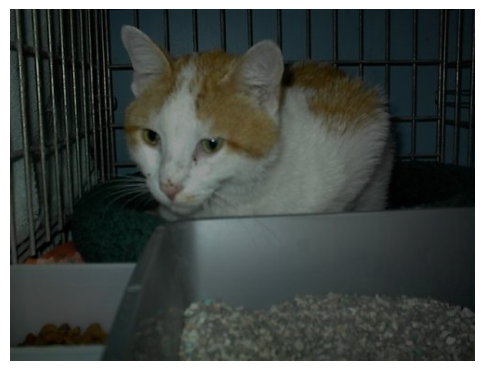

In [62]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Test klasöründeki görsellerden birini al
test_cat_folder = "/kaggle/working/cats_vs_dogs_split/test/Cat"
test_images = os.listdir(test_cat_folder)
img_path = os.path.join(test_cat_folder, test_images[0])  # ilk görseli al

# 1️⃣ Görseli yükleme ve diziye çevirme
def get_img_array(img_path, size=(150, 150)):
    img = image.load_img(img_path, target_size=size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

# 2️⃣ Grad-CAM hesaplama
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="last_conv"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# 3️⃣ Grad-CAM görselleştirme
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img).astype(np.uint8)

    heatmap = tf.image.resize(heatmap[..., np.newaxis], (img.shape[0], img.shape[1]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.repeat(heatmap, 3, axis=-1)

    superimposed_img = img * (1 - alpha) + heatmap * alpha
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()

# 4️⃣ Çalıştır
img_array = get_img_array(img_path)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


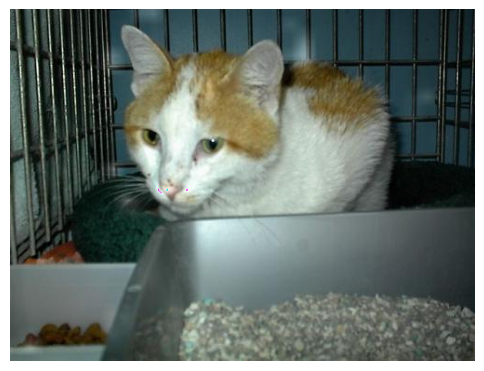

array([[[ 65,  82,  72],
        [ 74,  91,  83],
        [ 66,  81,  76],
        ...,
        [ 12,  24,  24],
        [  2,  14,  12],
        [ 42,  54,  52]],

       [[ 60,  77,  67],
        [ 76,  93,  85],
        [ 77,  92,  87],
        ...,
        [ 13,  25,  25],
        [  4,  16,  14],
        [ 44,  56,  54]],

       [[ 71,  88,  78],
        [ 76,  93,  85],
        [ 73,  88,  83],
        ...,
        [ 14,  26,  26],
        [  5,  17,  15],
        [ 45,  57,  55]],

       ...,

       [[ 90, 109, 105],
        [ 90, 109, 105],
        [ 89, 108, 104],
        ...,
        [ 64,  65,  57],
        [ 68,  69,  61],
        [ 70,  71,  63]],

       [[ 90, 109, 105],
        [ 90, 109, 105],
        [ 90, 109, 105],
        ...,
        [ 61,  62,  54],
        [ 63,  64,  56],
        [ 65,  66,  58]],

       [[ 92, 111, 107],
        [ 92, 111, 107],
        [ 92, 111, 107],
        ...,
        [ 61,  62,  54],
        [ 63,  64,  56],
        [ 65,  66,  58]]

In [64]:
import os

test_cat_folder = "/kaggle/working/cats_vs_dogs_split/test/Cat"
# Test klasöründeki ilk görseli seç
img_file = os.listdir(test_cat_folder)[0]
img_path = os.path.join(test_cat_folder, img_file)

# Sonra Grad-CAM kodunu kullanabiliriz
img_array = get_img_array(img_path)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


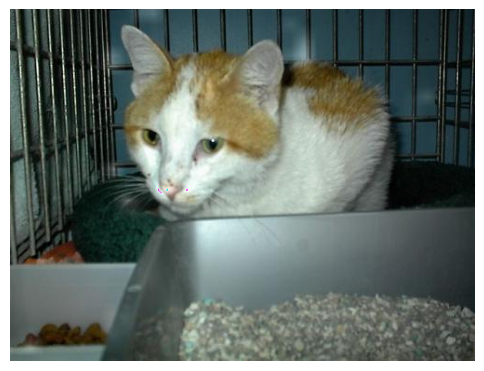

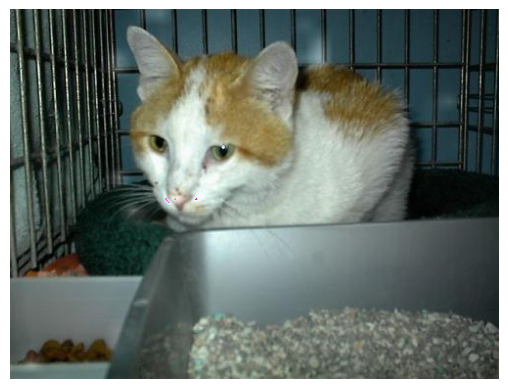

In [65]:
import matplotlib.pyplot as plt

# Heatmap'i oluştur
heatmap = make_gradcam_heatmap(img_array, model)

# Görselleştir
superimposed_img = display_gradcam(img_path, heatmap)

# Çıktıyı göster
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()


In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Test klasörleri
test_folder = "/kaggle/working/cats_vs_dogs_split/test"
output_folder = "/kaggle/working/gradcam_results"

# Klasörleri oluştur
for category in ["Cat", "Dog"]:
    os.makedirs(os.path.join(output_folder, category), exist_ok=True)

def get_img_array(img_path, target_size=(150,150)):
    img = image.load_img(img_path, target_size=target_size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="last_conv"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(conv_outputs, pooled_grads), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) if tf.reduce_max(heatmap) != 0 else 1
    heatmap = np.uint8(255 * heatmap)
    return heatmap

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img).astype(np.uint8)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)
    return superimposed_img

# Burada model değişkenini doğrudan kullanıyoruz, tekrar load_model yok
for category in ["Cat", "Dog"]:
    category_folder = os.path.join(test_folder, category)
    for img_file in os.listdir(category_folder):
        img_path = os.path.join(category_folder, img_file)
        try:
            img_array = get_img_array(img_path)
            heatmap = make_gradcam_heatmap(img_array, model)
            superimposed_img = display_gradcam(img_path, heatmap)
            
            save_path = os.path.join(output_folder, category, img_file)
            plt.imsave(save_path, superimposed_img)
        except Exception as e:
            print(f"Atlandı: {img_path} ({e})")
            continue

print("Tüm test görselleri için Grad-CAM oluşturuldu ve kaydedildi.")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/working/my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [68]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Test klasörleri
test_folder = "/kaggle/working/cats_vs_dogs_split/test"
output_folder = "/kaggle/working/gradcam_results"

# Klasörleri oluştur
for category in ["Cat", "Dog"]:
    os.makedirs(os.path.join(output_folder, category), exist_ok=True)

def get_img_array(img_path, target_size=(150,150)):
    img = image.load_img(img_path, target_size=target_size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name="last_conv"):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(conv_outputs, pooled_grads), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) if tf.reduce_max(heatmap) != 0 else 1
    heatmap = np.uint8(255 * heatmap)
    return heatmap

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img).astype(np.uint8)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = np.repeat(heatmap, 3, axis=-1)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)
    return superimposed_img

# Burada model değişkenini doğrudan kullanıyoruz, tekrar load_model yok
for category in ["Cat", "Dog"]:
    category_folder = os.path.join(test_folder, category)
    for img_file in os.listdir(category_folder):
        img_path = os.path.join(category_folder, img_file)
        try:
            img_array = get_img_array(img_path)
            heatmap = make_gradcam_heatmap(img_array, model)
            superimposed_img = display_gradcam(img_path, heatmap)
            
            save_path = os.path.join(output_folder, category, img_file)
            plt.imsave(save_path, superimposed_img)
        except Exception as e:
            print(f"Atlandı: {img_path} ({e})")
            continue

print("Tüm test görselleri için Grad-CAM oluşturuldu ve kaydedildi.")


Atlandı: /kaggle/working/cats_vs_dogs_split/test/Cat/62.jpg (operands could not be broadcast together with shapes (34,34,3) (378,500,3) )
Atlandı: /kaggle/working/cats_vs_dogs_split/test/Cat/11717.jpg (operands could not be broadcast together with shapes (34,34,3) (375,500,3) )
Atlandı: /kaggle/working/cats_vs_dogs_split/test/Cat/10923.jpg (operands could not be broadcast together with shapes (34,34,3) (270,285,3) )
Atlandı: /kaggle/working/cats_vs_dogs_split/test/Cat/3850.jpg (operands could not be broadcast together with shapes (34,34,3) (240,320,3) )
Atlandı: /kaggle/working/cats_vs_dogs_split/test/Cat/3378.jpg (operands could not be broadcast together with shapes (34,34,3) (470,305,3) )
Atlandı: /kaggle/working/cats_vs_dogs_split/test/Cat/3834.jpg (operands could not be broadcast together with shapes (34,34,3) (457,500,3) )
Atlandı: /kaggle/working/cats_vs_dogs_split/test/Cat/11879.jpg (operands could not be broadcast together with shapes (34,34,3) (118,185,3) )
Atlandı: /kaggle/wo

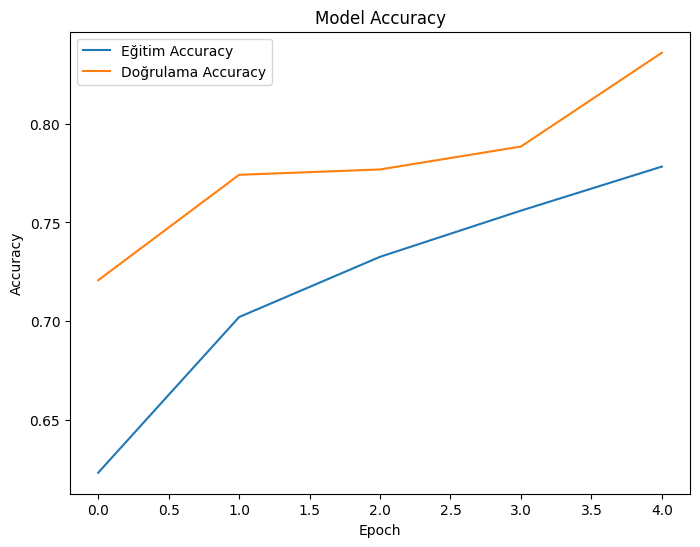

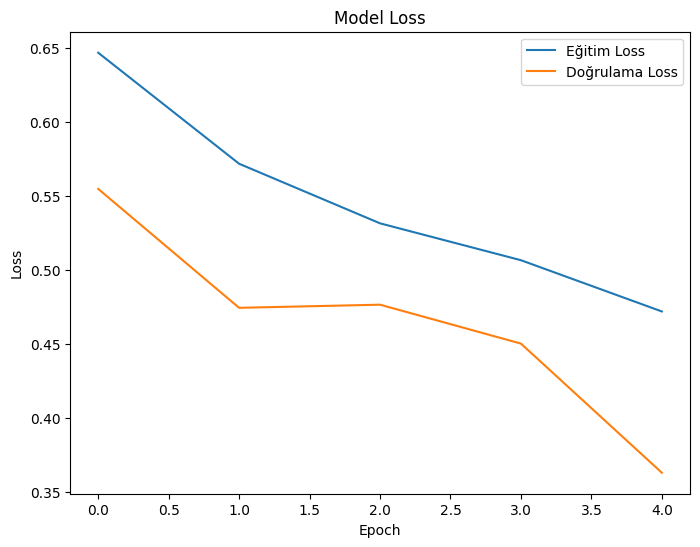

In [69]:
import matplotlib.pyplot as plt

# Eğitim & Doğrulama Accuracy grafiği
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Eğitim Accuracy')
plt.plot(history.history['val_accuracy'], label='Doğrulama Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Eğitim & Doğrulama Loss grafiği
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Eğitim Loss')
plt.plot(history.history['val_loss'], label='Doğrulama Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 6982 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


211/219 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8469 - loss: 0.3486

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8464 - loss: 0.3492
Test Loss: 0.3631
Test Accuracy: 0.8360
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step


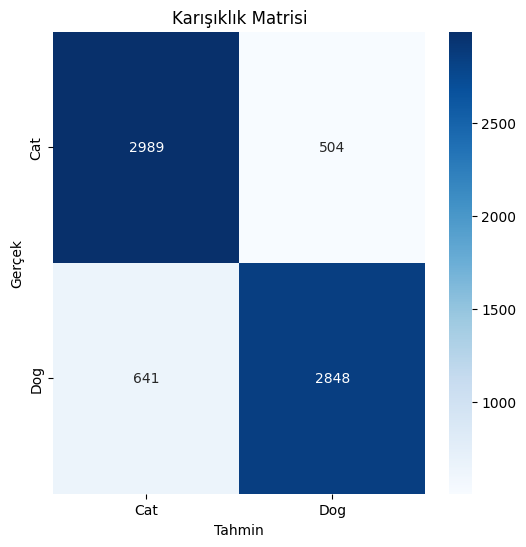


Sınıflandırma Raporu:

              precision    recall  f1-score   support

         Cat       0.82      0.86      0.84      3493
         Dog       0.85      0.82      0.83      3489

    accuracy                           0.84      6982
   macro avg       0.84      0.84      0.84      6982
weighted avg       0.84      0.84      0.84      6982



In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Test verisini yeniden yükle (ImageDataGenerator ile)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "/kaggle/working/cats_vs_dogs_split/test",
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Modeli test setinde değerlendir
loss, acc = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Tahminler
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = test_generator.classes

# Karışıklık matrisi
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))
